<a href="https://colab.research.google.com/github/AlexBB999/Thinkful/blob/master/30_6_Syllabis_Challenge_TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Challenge**

Challenge - Time Series Analysis

Using a different time series data set (either from FRED or elsewhere, go about the process of time series modeling.
** Specifically generate the following thing**s:

**Plot the time series, along with any logical or necessary differences to get a stationary dataset**

**Generate and interpret a PACF for the time series (and/or its differences)**

**Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data**

**Finally choose one specification and make the case for that as a logical model for your dataset**.

This should come in the form of a notebook with the necessary prose to explain your process. Remember to use the tools of text, visuals, and analysis to tell a clear and concise story with your data.

In [0]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline1

In [0]:
sp_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/SP500_raw.csv')

# Convert exchange rate to a number, with coersion to throw NA's if conversion not possible
sp_data['price'] = pd.to_numeric(sp_data.SP500, errors='coerce')

# Remove NA's
sp_data.dropna(inplace=True)

In [6]:
sp_data.head()

,DATE,SP500,price
0,2008-01-02,1447.16,1447.16
1,2008-01-03,1447.16,1447.16
2,2008-01-04,1411.63,1411.63
3,2008-01-07,1416.18,1416.18
4,2008-01-08,1390.19,1390.19


In [9]:
sp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267 entries, 0 to 2347
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2267 non-null   object 
 1   SP500   2267 non-null   object 
 2   price   2267 non-null   float64
dtypes: float64(1), object(2)
memory usage: 70.8+ KB


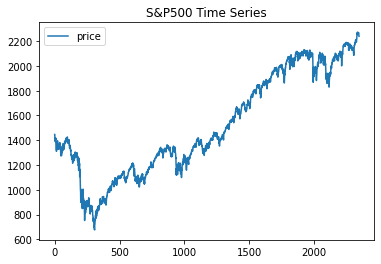

In [10]:
sp_data.plot()
plt.title('S&P500 Time Series')
plt.show()

**create a date based index.**

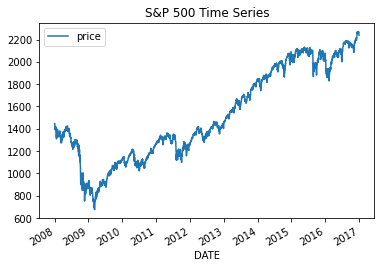

In [11]:
sp_data.index = pd.to_datetime(sp_data.DATE)
sp_data.plot()
plt.title('S&P 500 Time Series')
plt.show()

**For a series to be classified as stationary, it should not exhibit a trend**

**PLOT THE DIIFERENCE TO SEE IF IT MAKES TIME SERIES STATIONARY**

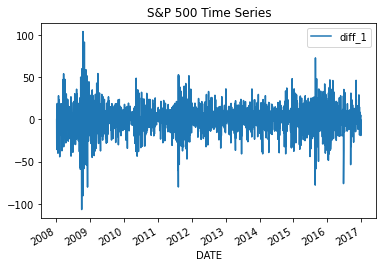

In [12]:
sp_data['diff_1'] = sp_data.price - sp_data.price.shift()
sp_data.plot(y='diff_1')
plt.title('S&P 500 Time Series')
plt.show()

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

**Generate and interpret a PACF for the time series (and/or its differences)**

**THESE PLOTS SHOW SIGINIFICANT CORRELATION AT LAG 1 SUGGESTS AN AUTORGESSIVE TERM OF OF ORDER 1**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'S&P PACF')

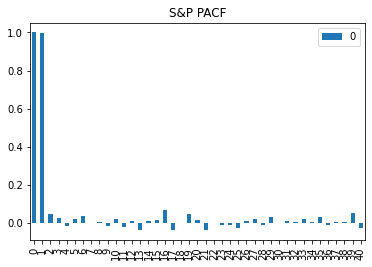

In [13]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(sp_data.price))
x_acf.plot(kind='bar')
plt.title("S&P PACF")

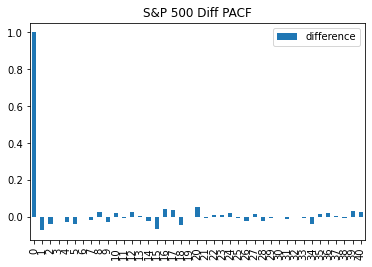

In [14]:
x_acf = pd.DataFrame(pacf(sp_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("S&P 500 Diff PACF")
plt.legend(['difference'])

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

**Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data**

**I WILL USE THE FOLLIWNG 5 ARIMA MODELS**



ARIMA(1,0,0)

ARIMA((1,0,1)

ARIMA(0,0,1)

ARIMA(0,0,0)

ARIMA(1,1,1) 

In [15]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2267
Model:                     ARMA(1, 0)   Log Likelihood               -9609.725
Method:                       css-mle   S.D. of innovations             16.753
Date:                Sun, 31 May 2020   AIC                          19225.451
Time:                        20:37:27   BIC                          19242.629
Sample:                             0   HQIC                         19231.718
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1686.5102    331.108      5.094      0.000    1037.550    2335.470
ar.L1.price     0.9993      0.001   1575.460      0.000       0.998       1.001
                                    Roots       

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2267
Model:                     ARMA(1, 1)   Log Likelihood               -9603.247
Method:                       css-mle   S.D. of innovations             16.705
Date:                Sun, 31 May 2020   AIC                          19214.494
Time:                        20:37:48   BIC                          19237.399
Sample:                             0   HQIC                         19222.851
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1707.4357    344.649      4.954      0.000    1031.935    2382.936
ar.L1.price     0.9994      0.001   1780.215      0.000       0.998       1.000
ma.L1.price    -0.0787      0.022     -3.614    

In [17]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2267
Model:                     ARMA(0, 1)   Log Likelihood              -15379.316
Method:                       css-mle   S.D. of innovations            213.670
Date:                Sun, 31 May 2020   AIC                          30764.632
Time:                        20:38:07   BIC                          30781.811
Sample:                             0   HQIC                         30770.900
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1520.7783      8.838    172.071      0.000    1503.456    1538.101
ma.L1.price     0.9699      0.004    249.737      0.000       0.962       0.977
                                    Roots       

In [18]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(0,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2267
Model:                     ARMA(0, 0)   Log Likelihood              -16876.921
Method:                           css   S.D. of innovations            413.918
Date:                Sun, 31 May 2020   AIC                          33757.842
Time:                        20:38:25   BIC                          33769.294
Sample:                             0   HQIC                         33762.020
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1520.6520      8.693    174.921      0.000    1503.613    1537.691
Residuals Description
count    2.267000e+03
mean     5.646730e-14
std      4.140090e+02
min     -8.441220e+02
25%     -3.256120e+02

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [19]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2266
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9592.974
Method:                       css-mle   S.D. of innovations             16.685
Date:                Sun, 31 May 2020   AIC                          19193.947
Time:                        20:38:41   BIC                          19216.850
Sample:                             1   HQIC                         19202.304
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3529      0.289      1.222      0.222      -0.213       0.919
ar.L1.D.price     0.5832      0.155      3.765      0.000       0.280       0.887
ma.L1.D.price    -0.6565      0.144     

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

**Finally choose one specification and make the case for that as a logical model for your dataset**.

**THE MODEL WITH THE LOWEST AIC IS THE BEST MODEL--IN THIS CASE IT IS ARIMA(1,1,1)**